In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import pearsonr, spearmanr
from sklearn.cluster import KMeans

import os
from env import username, password, host
import env

import wrangle as w

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

## <u>Wrangling (Acquiring and Preparing) Our Data<u>

In [2]:
df = w.acquire_df()

Using cached csv


In [3]:
df = w.clean_df(df)

In [4]:
cols = ['bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet',
       'lotsizesquarefeet', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount']

df = w.remove_outliers(df, 2.7, cols)

In [5]:
df = w.create_features(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46867 entries, 1 to 77573
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   parcelid                      46867 non-null  int64   
 1   bathroomcnt                   46867 non-null  float64 
 2   bedroomcnt                    46867 non-null  float64 
 3   calculatedfinishedsquarefeet  46867 non-null  float64 
 4   fips                          46867 non-null  float64 
 5   latitude                      46867 non-null  float64 
 6   longitude                     46867 non-null  float64 
 7   lotsizesquarefeet             46867 non-null  float64 
 8   rawcensustractandblock        46867 non-null  float64 
 9   regionidcounty                46867 non-null  float64 
 10  roomcnt                       46867 non-null  float64 
 11  yearbuilt                     46867 non-null  float64 
 12  structuretaxvaluedollarcnt    46867 non-null  

In [7]:
df.county.value_counts()

los_angeles    30908
orange         11687
ventura         4272
Name: county, dtype: int64

In [8]:
train, validate, test = w.split_data(df)

In [9]:
train.shape, validate.shape, test.shape

((26245, 35), (11248, 35), (9374, 35))

In [10]:
train.columns.tolist()

['parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fips',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'regionidcounty',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror',
 'transactiondate',
 'age',
 'county',
 'age_bin',
 'taxrate',
 'acres',
 'acres_bin',
 'county_code_bin',
 'abs_logerror',
 'abs_logerror_bin',
 'logerror_bin',
 'sqft_bin',
 'structure_dollar_per_sqft',
 'structure_dollar_sqft_bin',
 'land_dollar_per_sqft',
 'lot_dollar_sqft_bin',
 'bath_bed_ratio']

In [11]:
# # Remove any outliers that got through our wrangle and might skew our data
# cols = ['bathroomcnt', 'bedroomcnt',
#        'calculatedfinishedsquarefeet',
#        'lotsizesquarefeet', 'roomcnt', 'yearbuilt',
#        'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
#        'landtaxvaluedollarcnt', 'taxamount']

# w.remove_outliers(train, 2.5, cols)

In [12]:
w.missing_values(train)

,count,percent
parcelid,0,0.000000
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
calculatedfinishedsquarefeet,0,0.000000
fips,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
lotsizesquarefeet,0,0.000000
rawcensustractandblock,0,0.000000
regionidcounty,0,0.000000


In [13]:
w.missing_counts_and_percents(train)

,num_cols_missing,percent_cols_missing,0
0,0,0.000000,8751
1,1,0.028571,17494


#### Now that we have ensured our data is clean and has no nulls, let's get into exploring...

## <u>Exploring Our Data<u>

In [14]:
train.shape

(26245, 35)

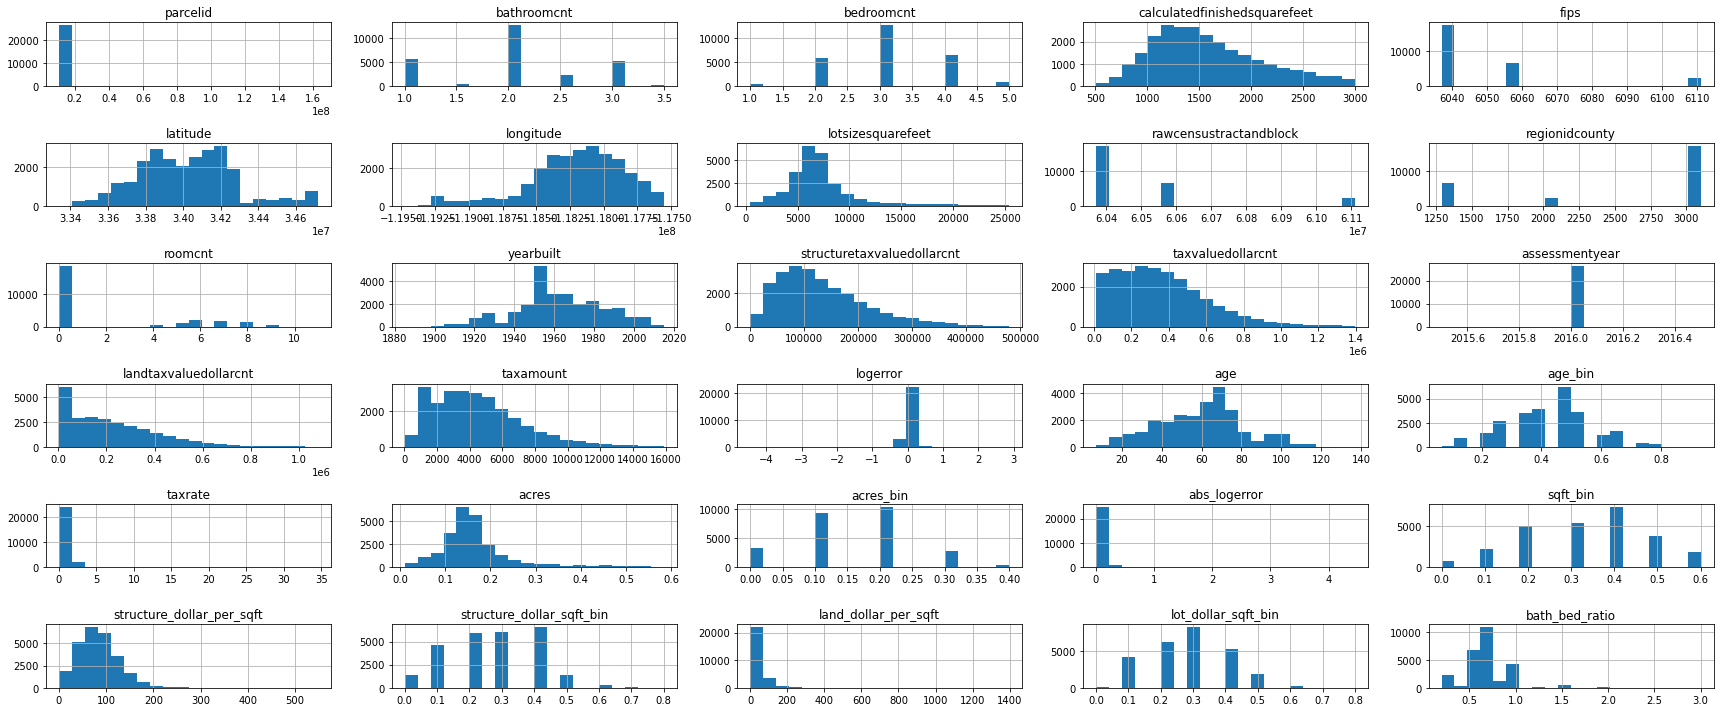

In [15]:
train.hist(figsize = (24,10), bins = 20)
plt.tight_layout()

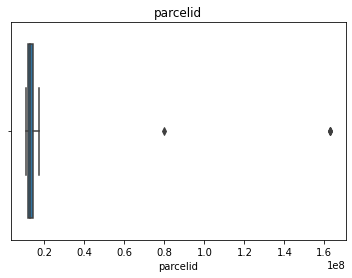

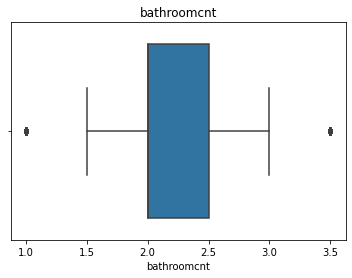

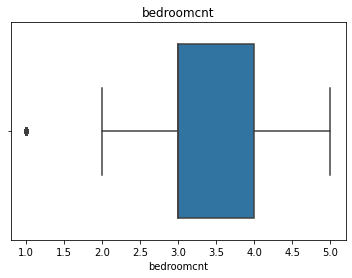

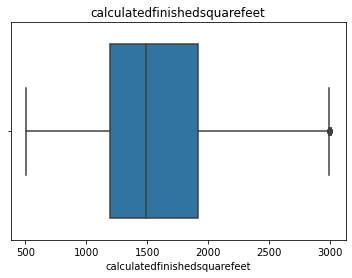

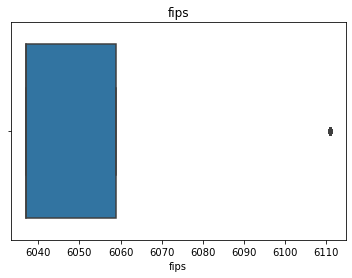

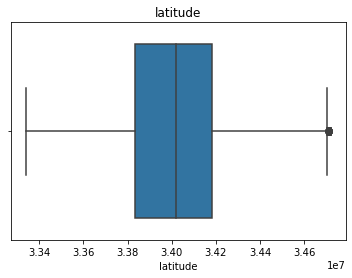

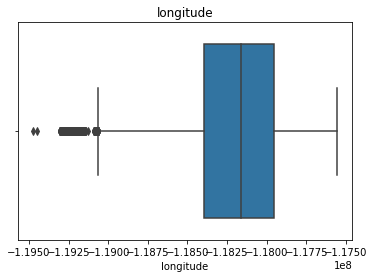

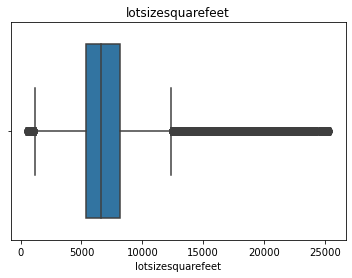

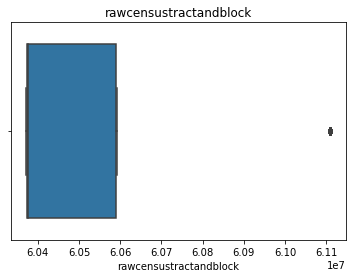

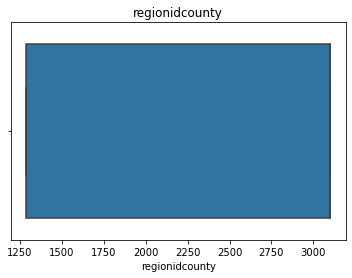

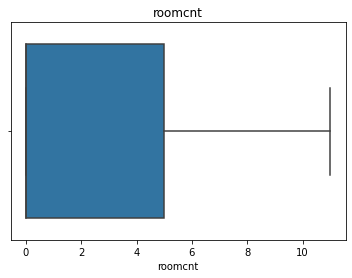

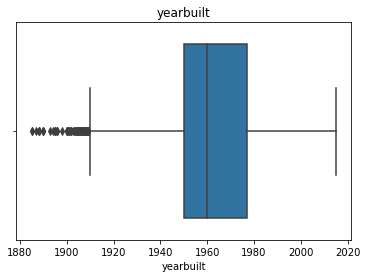

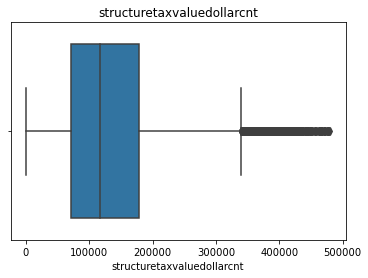

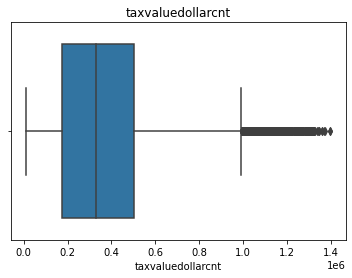

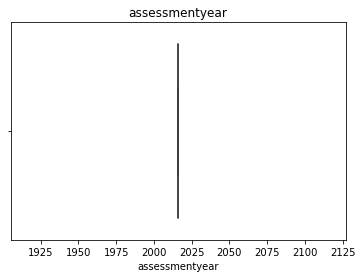

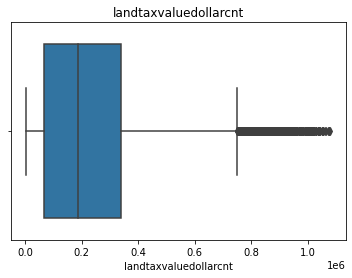

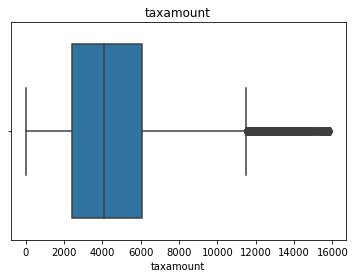

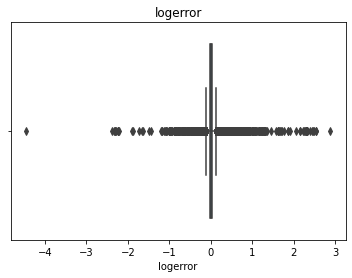

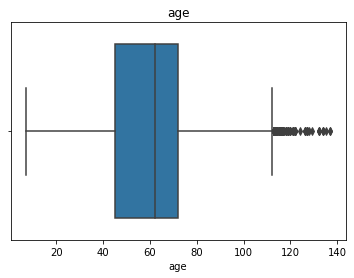

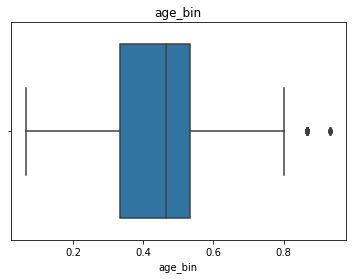

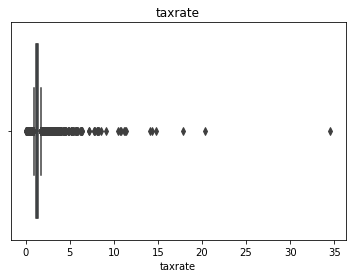

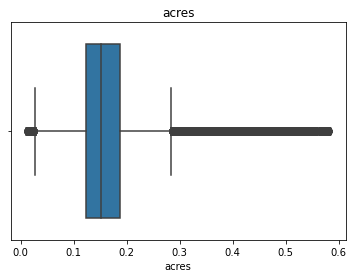

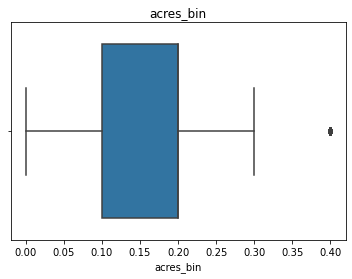

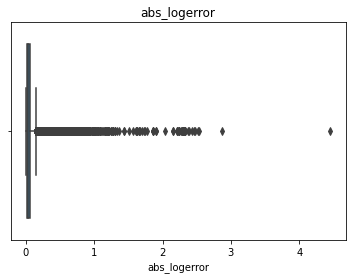

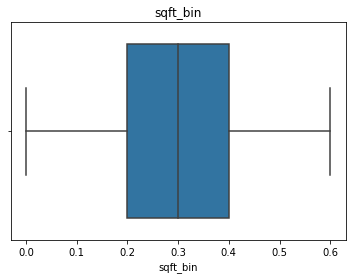

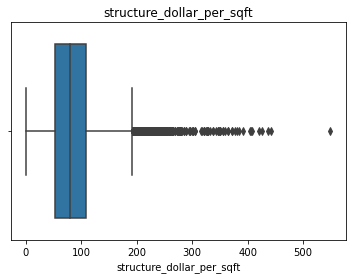

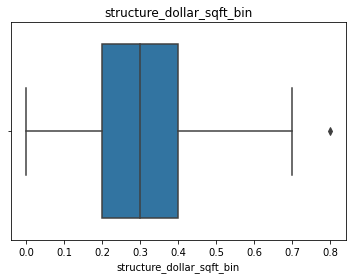

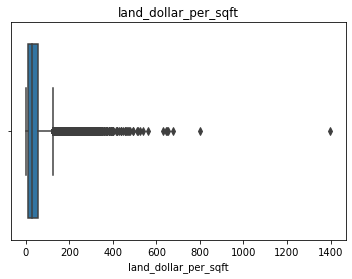

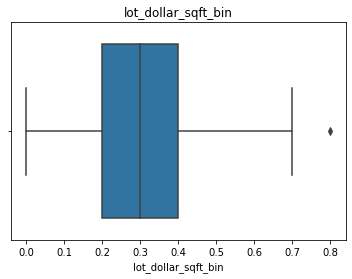

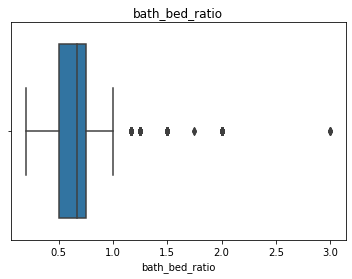

In [16]:
for col in train.select_dtypes('number'):
    sns.boxplot(train[col])
    plt.title(col)
    plt.show()


In [17]:
train.head().T

,51603,32732,12769,27892,20395
parcelid,17100685,13059151,14011211,14023324,14018787
bathroomcnt,1.5,3.0,2.5,2.0,2.0
bedroomcnt,2.0,3.0,5.0,3.0,3.0
calculatedfinishedsquarefeet,978.0,1745.0,1783.0,1262.0,1592.0
fips,6111.0,6037.0,6059.0,6059.0,6059.0
latitude,34346166.0,34005011.0,33819064.0,33684442.0,33690348.0
longitude,-119083308.0,-117789578.0,-118024423.0,-117912105.0,-117928065.0
lotsizesquarefeet,956.0,9450.0,6000.0,6300.0,6600.0
rawcensustractandblock,61110007.021009,60374033.202006,60591101.093004,60590639.021013,60590638.052001
regionidcounty,2061.0,3101.0,1286.0,1286.0,1286.0


[(-1.0, 1.0), (0.0, 1500.0)]

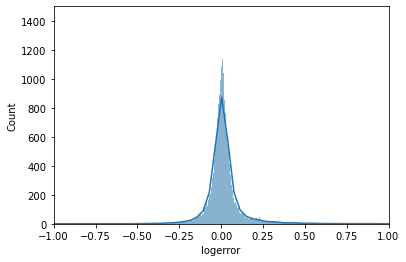

In [18]:
# Create histogram
ax = sns.histplot(data=train, x="logerror", kde=True)
# set x and y limits to 'zoom in'
ax.set(xlim = (-1, 1), ylim = (0, 1500))

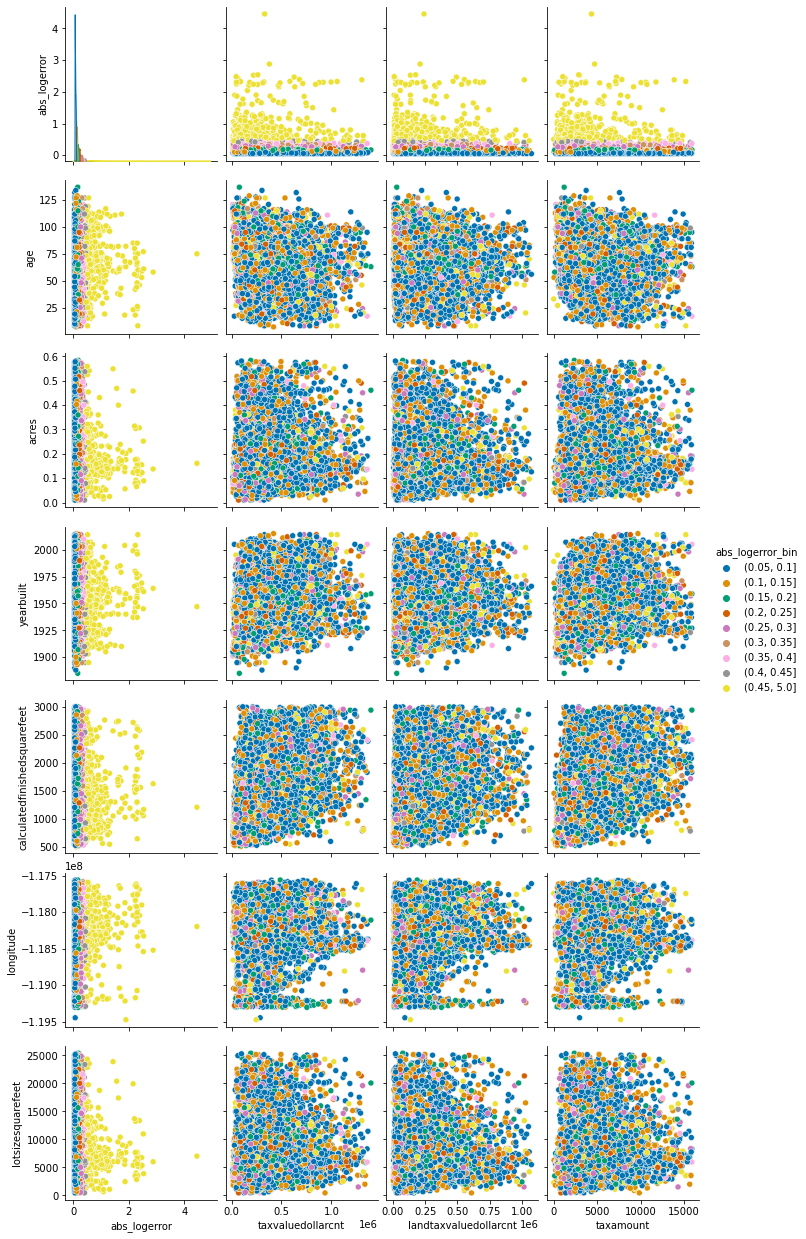

In [19]:
sns.pairplot(data = train, hue = 'abs_logerror_bin', 
             x_vars = ['abs_logerror', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'],
             
             y_vars = ['abs_logerror', 'age', 'acres', 'yearbuilt', 'calculatedfinishedsquarefeet', 'longitude', 'lotsizesquarefeet']
            , palette = 'colorblind')

In [20]:
# Remove any outliers that got through our wrangle and might skew our data
cols = ['bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet',
       'lotsizesquarefeet', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount']

w.remove_outliers(train, 2.5, cols)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcounty,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,age,county,age_bin,taxrate,acres,acres_bin,county_code_bin,abs_logerror,abs_logerror_bin,logerror_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio
51603,17100685,1.5,2.0,978.0,6111.0,34346166.0,-119083308.0,956.0,6.111001e+07,2061.0,4.0,1973.0,72515.0,207185.0,2016.0,134670.0,2377.14,0.220320,2017-06-28,49.0,ventura,0.333,1.147351,0.021947,0.0,Ventura County,0.220320,"(0.2, 0.25]","(0.2, 5.0]",0.1,74.146217,0.2,140.868201,0.5,0.750000
32732,13059151,3.0,3.0,1745.0,6037.0,34005011.0,-117789578.0,9450.0,6.037403e+07,3101.0,0.0,1988.0,208883.0,652323.0,2016.0,443440.0,8360.40,0.105204,2017-05-04,34.0,los_angeles,0.266,1.281635,0.216942,0.2,Los Angeles County,0.105204,"(0.1, 0.15]","(0.05, 0.2]",0.4,119.703725,0.4,46.924868,0.3,1.000000
12769,14011211,2.5,5.0,1783.0,6059.0,33819064.0,-118024423.0,6000.0,6.059110e+07,1286.0,8.0,1965.0,48343.0,73975.0,2016.0,25632.0,1081.46,-0.000449,2017-02-27,57.0,orange,0.400,1.461926,0.137741,0.1,Orange County,0.000449,NaN,"(-0.05, 0.05]",0.4,27.113292,0.1,4.272000,0.1,0.500000
27892,14023324,2.0,3.0,1262.0,6059.0,33684442.0,-117912105.0,6300.0,6.059064e+07,1286.0,6.0,1958.0,83510.0,576979.0,2016.0,493469.0,6708.02,0.032170,2017-04-19,64.0,orange,0.466,1.162611,0.144628,0.1,Orange County,0.032170,NaN,"(-0.05, 0.05]",0.3,66.172742,0.2,78.328413,0.4,0.666667
20395,14018787,2.0,3.0,1592.0,6059.0,33690348.0,-117928065.0,6600.0,6.059064e+07,1286.0,6.0,1960.0,84844.0,715000.0,2016.0,630156.0,8156.64,0.026129,2017-03-27,62.0,orange,0.466,1.140789,0.151515,0.2,Orange County,0.026129,NaN,"(-0.05, 0.05]",0.4,53.293970,0.2,95.478182,0.4,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,12680576,2.0,3.0,1539.0,6037.0,33810974.0,-118358292.0,6432.0,6.037651e+07,3101.0,0.0,1962.0,59699.0,132933.0,2016.0,73234.0,1694.60,0.000109,2017-02-14,60.0,los_angeles,0.400,1.274778,0.147658,0.1,Los Angeles County,0.000109,NaN,"(-0.05, 0.05]",0.4,38.790773,0.1,11.385883,0.2,0.666667
29420,13854370,3.0,4.0,1721.0,6059.0,33921956.0,-117949113.0,6180.0,6.059001e+07,1286.0,7.0,1957.0,82284.0,515000.0,2016.0,432716.0,5871.38,0.179759,2017-04-25,65.0,orange,0.466,1.140074,0.141873,0.1,Orange County,0.179759,"(0.15, 0.2]","(0.05, 0.2]",0.4,47.811737,0.1,70.018770,0.4,0.750000
27072,12971536,1.0,2.0,984.0,6037.0,34142596.0,-117971655.0,6888.0,6.037430e+07,3101.0,0.0,1950.0,89068.0,129483.0,2016.0,40415.0,1971.02,0.106041,2017-04-17,72.0,los_angeles,0.533,1.522223,0.158127,0.2,Los Angeles County,0.106041,"(0.1, 0.15]","(0.05, 0.2]",0.1,90.516260,0.3,5.867451,0.2,0.500000
17556,12650331,1.0,2.0,988.0,6037.0,33732634.0,-118284395.0,5003.0,6.037297e+07,3101.0,0.0,1922.0,12197.0,35154.0,2016.0,22957.0,491.24,0.266841,2017-03-16,100.0,los_angeles,0.666,1.397394,0.114853,0.1,Los Angeles County,0.266841,"(0.25, 0.3]","(0.2, 5.0]",0.1,12.345142,0.0,4.588647,0.1,0.500000


#### Initial Questions:

- Which county has the highest absolute log error?
- Is there a linear relationship between logerror and age for each county?
- Is there a linear relationship between acres and logerror?
- What counties have the largest log errors?

In [21]:
train_scaled, validate_scaled, test_scaled = w.min_max_split(train, validate, test)

### Question #1:
#### Which county has the highest number of absolute log errors?

#### Plot it...

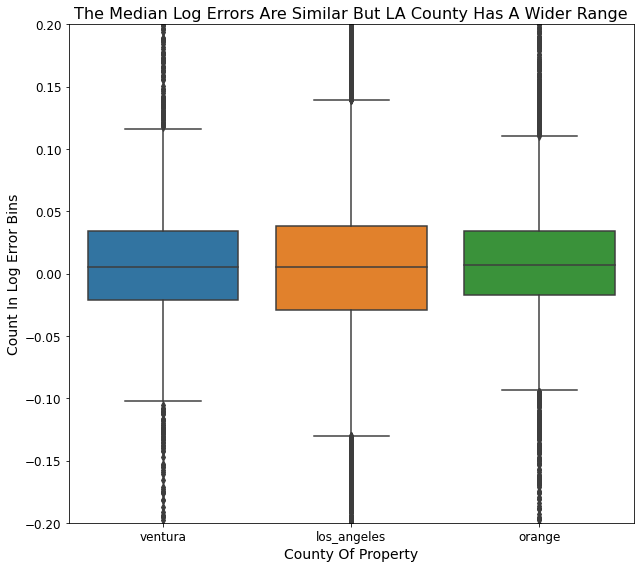

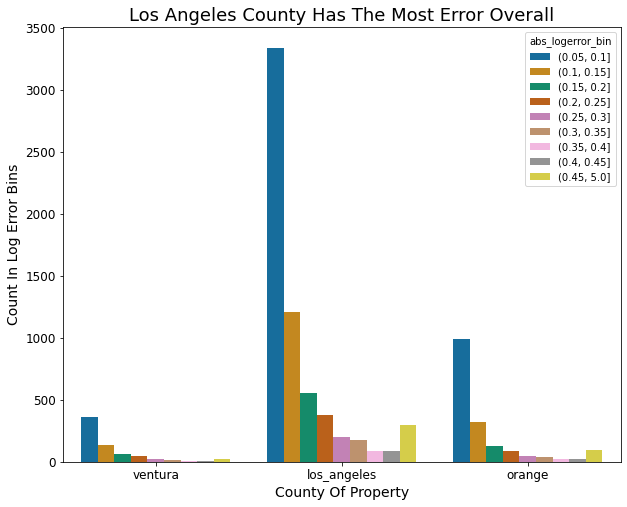

In [22]:
plt.figure(figsize=(9,8))
sns.boxplot(train.county, train.logerror)
plt.title('The Median Log Errors Are Similar But LA County Has A Wider Range', fontsize = 16)
plt.ylim(-.2, .2)
plt.xlabel('County Of Property', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Count In Log Error Bins', fontsize = 14)
plt.tight_layout()
plt.show()

plt.figure(figsize = (10,8))
plt.title('Los Angeles County Has The Most Error Overall', fontsize = 18)
sns.countplot(data = train, x= 'county', hue = 'abs_logerror_bin', palette = 'colorblind')
plt.xlabel('County Of Property', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Count In Log Error Bins', fontsize = 14)

plt.show()

#### Answer to question #1:

Through the use of our visuals, we see that Los Angeles county has the most errors but htis seems to be brought on my a vast majority of Zestimates being made in the county versus Ventura and Orange. The median of all 3 is very close.

### Question #2:
#### Is there a linear relationship between logerror and age for each county?

#### Plot it...

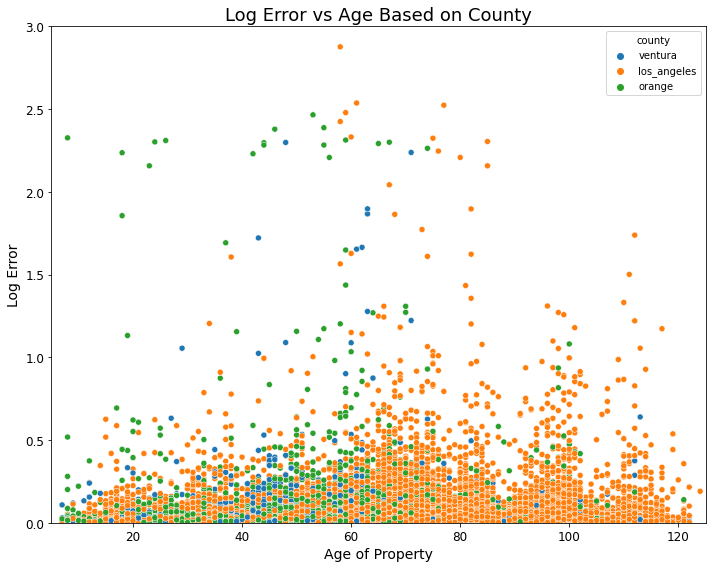

In [23]:
x = train['age']
y = train['abs_logerror']
# Set size of figure
plt.figure(figsize = (10,8))
# Create scatterplot
ax = sns.scatterplot(data=train, x= x, y= y, hue="county")
# set x and y limits to 'zoom in'
ax.set(xlim = (5, 125), ylim= (0,3)) # set the limits to the desired ones
# fit labels and legend
plt.title('Log Error vs Age Based on County', fontsize = 18)
plt.xlabel('Age of Property', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Log Error', fontsize = 14)

plt.tight_layout() 
plt.show()

#### Stats Test (Pearson's r):

In [24]:
# H0 - There is no linear relationship between age and logerror.
# H1 - There is a linear realtionship between age and log error.
x = train['age']
y = train['abs_logerror']
a = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < a:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = 0.11830338090607459
p = 1.9912388786075558e-82
We reject the H0.


#### Answer to question #2:

After the visual and Pearson's r test, we are lead to believe that there could be a linear relationship between property age and logerror.

### Question #3:
#### Is there a linear relationship between acres and logerror?

#### Plot it...

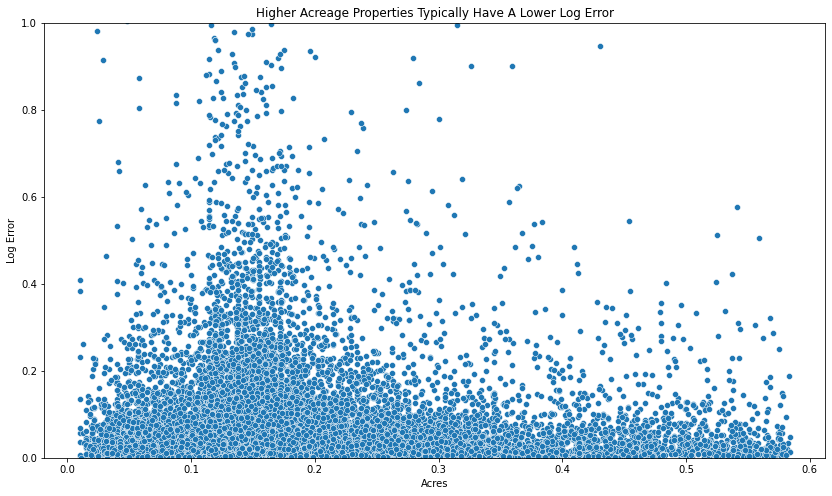

In [25]:
# Plot of log error vs number of bedrooms
f, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(x = 'acres', y = 'abs_logerror', data = train)
plt.ylim(0,1)
plt.title('Higher Acreage Properties Typically Have A Lower Log Error')
plt.xlabel('Acres')
plt.ylabel('Log Error')
plt.show()

# Estimates for 3 and 4 br are more spot-on vs others.

#### Stats Test (Pearson's r ):

In [26]:
# H0 - There is no linear relationship between acres and logerror.
# H1 - There is a linear realtionship between acres and log error.
x = train['acres']
y = train['abs_logerror']
a = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < a:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = 0.009454459708166657
p = 0.12561798010573963
We fail to reject the H0.


#### Answer to question #3:

After our visual and stats test, we are lead to believe that there is no linear relationship between acres and log error.

### Question 4:
#### What counties have the largest log errors?

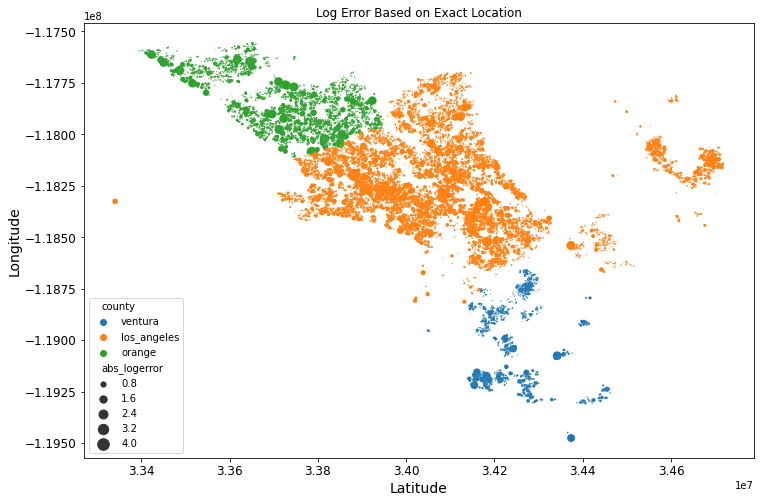

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

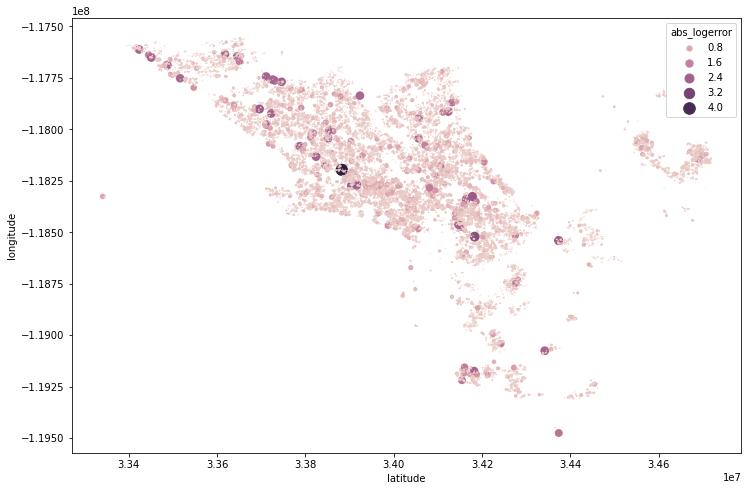

In [27]:
# Plot Locational Data
plt.figure(figsize = (12,8))
sns.scatterplot(x='latitude', y='longitude', hue='county',
                size = 'abs_logerror', sizes = (0,150), data=train)
plt.title('Log Error Based on Exact Location')

plt.xlabel('Latitude', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Longitude', fontsize = 14)
plt.show()

# Plot absolute log error density
plt.figure(figsize = (12,8))
sns.scatterplot(x='latitude', y='longitude', hue='abs_logerror',
                size = 'abs_logerror', sizes = (0,150), data=train)

##### Answer to question #4

Using our top visual, we see the layout of our counties. In the bottom viz, we see that the most significant errors are found mainly in portions of Los Angeles county and leading into Orange county.

### <u>Clustering<u>

In [28]:
# Set target variables
target_var = 'abs_logerror'

#Make copies of train, validate, and test
train = train_scaled.copy()
validate = validate_scaled.copy()
test = test_scaled.copy()

# create X_train by dropping the target variable 
X_train = train.drop(columns=[target_var])
# create y_train by keeping only the target variable.
y_train = train[[target_var]]

# create X_validate by dropping the target variable 
X_validate = validate.drop(columns=[target_var])
# create y_validate by keeping only the target variable.
y_validate = validate[[target_var]]

# create X_test by dropping the target variable 
X_test = test.drop(columns=[target_var])
# create y_test by keeping only the target variable.
y_test = test[[target_var]]

#### location_cluster

In [29]:
# Scale Needed data for cluster
# Exploring one version of clustering 
cluster_vars = ['longitude', 'latitude']
cluster_name = 'location_cluster'

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

In [30]:
X_validate_scaled = scaler.transform(X_validate[cluster_vars])
X_test_scaled = scaler.transform(X_test[cluster_vars])

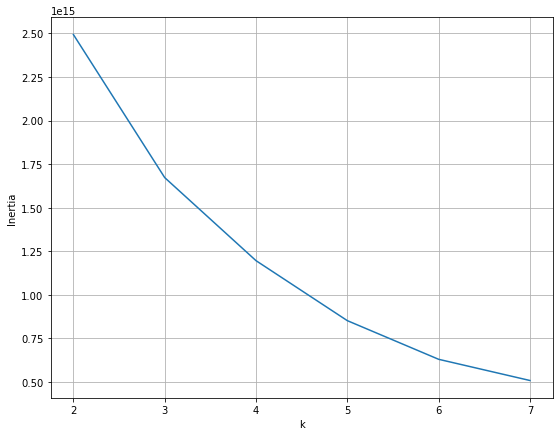

In [31]:
w.inertia(train, 'latitude', 'longitude', 2,8)

In [32]:
# Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [33]:
#The numbers output here are the groups that our K-means algorithm predicted each row to be in. Let's go ahead and store the predicted cluster back into our original dataframe.
train['location_cluster'] = kmeans.predict(X_train_scaled)
train.location_cluster = train.location_cluster.astype('category')

In [34]:
validate['location_cluster'] = kmeans.predict(X_validate_scaled)
validate.location_cluster = validate.location_cluster.astype('category')

test['location_cluster'] = kmeans.predict(X_test_scaled)
test.location_cluster = test.location_cluster.astype('category')

(-3.0, 3.0)

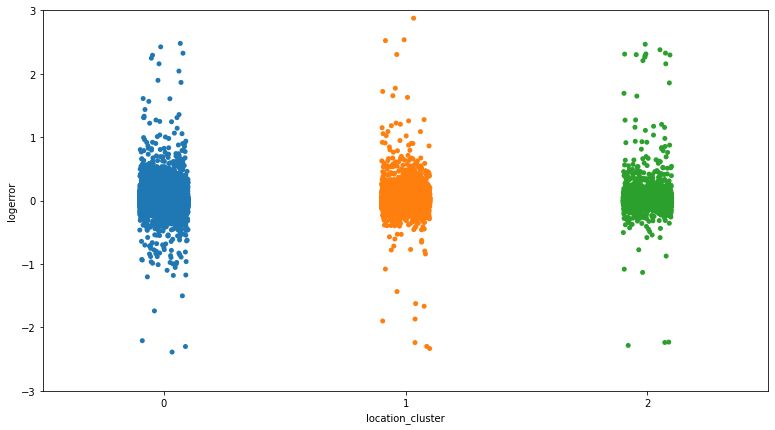

In [35]:
x = train.location_cluster
y = train.logerror
plt.figure(figsize = (13,7))
ax = sns.stripplot(x=x, y=y, data= train.sample(1000))
plt.ylim(-3,3)

Text(0.5, 1.0, 'Original Data with Cluster Labels')

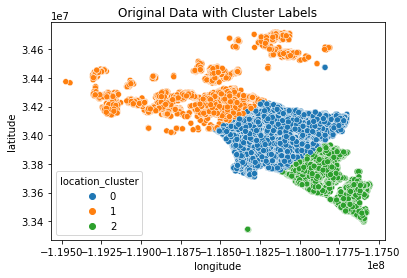

In [36]:
sns.scatterplot(y='latitude', x='longitude', hue='location_cluster', data=train)
plt.title('Original Data with Cluster Labels')

In [37]:
train.groupby('location_cluster')['latitude', 'longitude', 'abs_logerror'].mean()

,latitude,longitude,abs_logerror
location_cluster,,,
0,3.397908e+07,-1.181511e+08,0.072145
1,3.431879e+07,-1.185677e+08,0.062355
2,3.370371e+07,-1.178216e+08,0.058248


In [38]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.location_cluster==0].abs_logerror
overall_mean = train.abs_logerror.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(4.814318882685003, 1.494278628577564e-06)
We reject the Null Hypothesis


In [39]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.location_cluster==1].abs_logerror
overall_mean = train.abs_logerror.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(-2.5521256201541385, 0.01072527443873934)
We fail to reject the Null Hypothesis


In [40]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.location_cluster==2].abs_logerror
overall_mean = train.abs_logerror.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(-3.9704279640111957, 7.26210254638685e-05)
We fail to reject the Null Hypothesis


#### Findings:
 - location_cluster1 is the most relevant cluster
 - Property with the highest longitudinal distance had the highest absolute logerror
 - Property with the lowest longitudinal distance had the lowest absolute logerror

#### house_to_lot_cluster

In [41]:
# Scale Needed data for cluster
#Exploring one version of clustering 
cluster_vars = ['calculatedfinishedsquarefeet', 'lotsizesquarefeet']
cluster_name = 'house_to_lot_cluster'

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

In [42]:
X_validate_scaled = scaler.transform(X_validate[cluster_vars])
X_test_scaled = scaler.transform(X_test[cluster_vars])

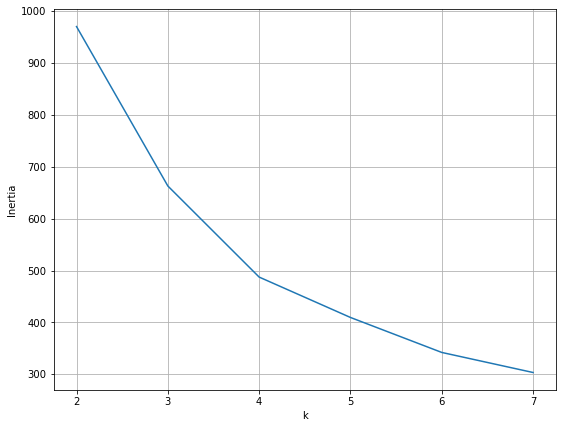

In [43]:
w.inertia(train, 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 2,8)

In [44]:
# Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([1, 2, 2, ..., 1, 1, 1], dtype=int32)

In [45]:
#The numbers output here are the groups that our K-means algorithm predicted each row to be in. Let's go ahead and store the predicted cluster back into our original dataframe.
train['house_to_lot_cluster'] = kmeans.predict(X_train_scaled)
train.house_to_lot_cluster = train.house_to_lot_cluster.astype('category')

In [46]:
validate['house_to_lot_cluster'] = kmeans.predict(X_validate_scaled)
validate.house_to_lot_cluster = validate.house_to_lot_cluster.astype('category')

test['house_to_lot_cluster'] = kmeans.predict(X_test_scaled)
test.house_to_lot_cluster = test.house_to_lot_cluster.astype('category')

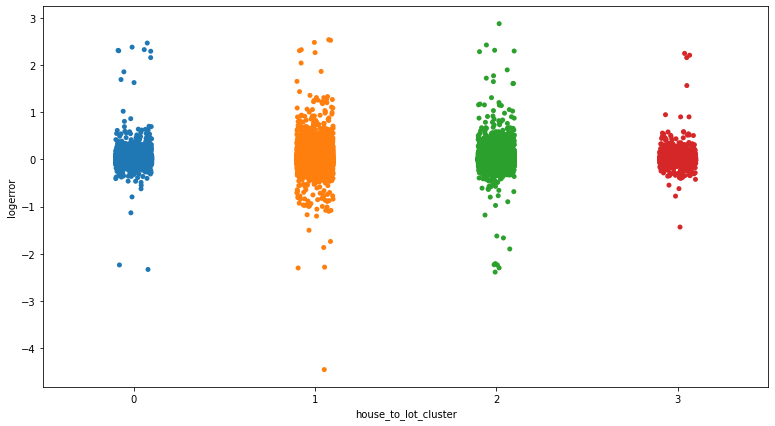

In [47]:
x = train.house_to_lot_cluster
y = train.logerror
plt.figure(figsize = (13,7))
ax = sns.stripplot(x=x, y=y, data= train.sample(1000))

Text(0.5, 1.0, 'Original Data with Cluster Labels')

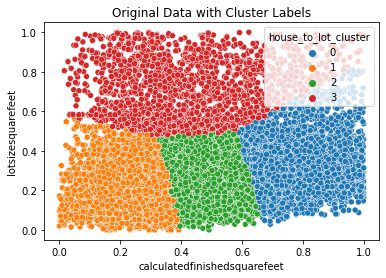

In [48]:
sns.scatterplot(x= 'calculatedfinishedsquarefeet', y = 'lotsizesquarefeet', hue='house_to_lot_cluster', data=train)
plt.title('Original Data with Cluster Labels')

In [49]:
train.groupby('house_to_lot_cluster')['calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'abs_logerror'].mean()

,calculatedfinishedsquarefeet,lotsizesquarefeet,abs_logerror
house_to_lot_cluster,,,
0,0.774431,0.306800,0.056773
1,0.246403,0.216872,0.075129
2,0.474147,0.252604,0.059770
3,0.423239,0.711514,0.070856


In [50]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.house_to_lot_cluster==0].abs_logerror
overall_mean = train.abs_logerror.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(-4.758717965754292, 2.0077661241475214e-06)
We fail to reject the Null Hypothesis


In [51]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.house_to_lot_cluster==1].abs_logerror
overall_mean = train.abs_logerror.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(6.072503370833141, 1.3030634906066382e-09)
We reject the Null Hypothesis


In [52]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.house_to_lot_cluster==2].abs_logerror
overall_mean = train.abs_logerror.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(-4.737898085192486, 2.1912979450661805e-06)
We fail to reject the Null Hypothesis


In [53]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.house_to_lot_cluster==3].abs_logerror
overall_mean = train.abs_logerror.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(1.4920360687935519, 0.1358637636273446)
We fail to reject the Null Hypothesis


#### Findings:
 - house_to_lot_cluster2 is the most relevant cluster
 - Cluster 0 with smaller lot size and median home size had the lowest absolute log error
 - Clusters 1 , as the smallest properties and homes showed the highest absolute log error

#### age_acres_cluster

In [54]:
# Scale Needed data for cluster
#Exploring one version of clustering 
cluster_vars = ['age', 'acres']
cluster_name = 'age_acres_cluster'

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

In [55]:
X_validate_scaled = scaler.transform(X_validate[cluster_vars])
X_test_scaled = scaler.transform(X_test[cluster_vars])

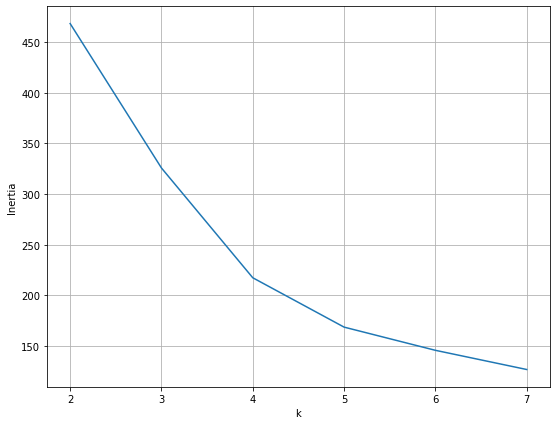

In [56]:
w.inertia(train, 'age', 'acres', 2,8)

In [57]:
# Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([0, 0, 2, ..., 2, 2, 0], dtype=int32)

In [58]:
#The numbers output here are the groups that our K-means algorithm predicted each row to be in. Let's go ahead and store the predicted cluster back into our original dataframe.
train['age_acres_cluster'] = kmeans.predict(X_train_scaled)
train.age_acres_cluster = train.age_acres_cluster.astype('category')


In [59]:
validate['age_acres_cluster'] = kmeans.predict(X_validate_scaled)
validate.age_acres_cluster = validate.age_acres_cluster.astype('category')

test['age_acres_cluster'] = kmeans.predict(X_test_scaled)
test.age_acres_cluster = test.age_acres_cluster.astype('category')

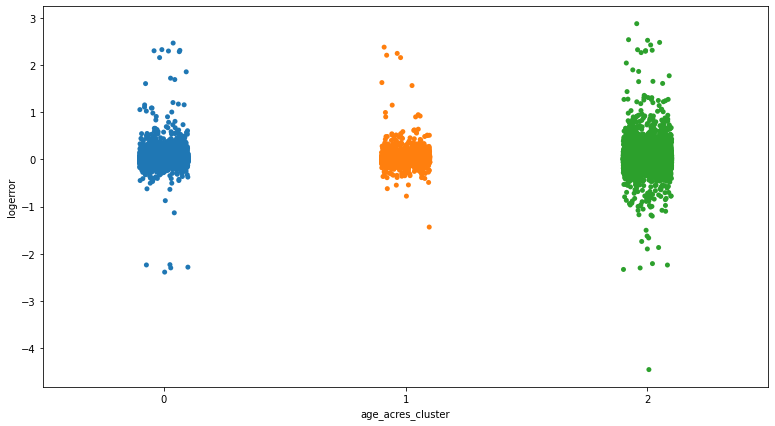

In [60]:
x = train.age_acres_cluster
y = train.logerror
plt.figure(figsize = (13,7))
ax = sns.stripplot(x=x, y=y, data= train.sample(1000))

Text(0.5, 1.0, 'Original Data with Cluster Labels')

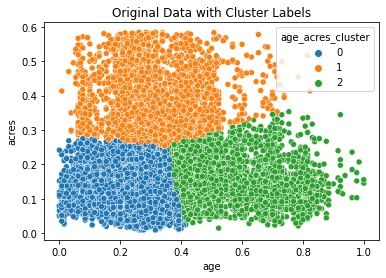

In [61]:
sns.scatterplot(x='age', y='acres', hue='age_acres_cluster', data=train)
plt.title('Original Data with Cluster Labels')

In [62]:
train.groupby('age_acres_cluster')['age', 'acres', 'abs_logerror'].mean()

,age,acres,abs_logerror
age_acres_cluster,,,
0,0.242576,0.133093,0.049851
1,0.322800,0.387122,0.070061
2,0.515587,0.155428,0.075159


Stats Test (T-Test):

#### Hypothesis:
 - H0: Absolute log error for age_acres_cluster0 == Absolute log error mean.
 - Ha: Absolute log error for age_acres_cluster0 != Absolute log error mean.

In [63]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.age_acres_cluster==0].abs_logerror
overall_mean = train.abs_logerror.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(-12.702023002605943, 1.2028002458260268e-36)
We fail to reject the Null Hypothesis


In [64]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.age_acres_cluster==1].abs_logerror
overall_mean = train.abs_logerror.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(1.4389640716472625, 0.1502833355575455)
We fail to reject the Null Hypothesis


In [65]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.age_acres_cluster==2].abs_logerror
overall_mean = train.abs_logerror.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(7.328204671098586, 2.4527497306969954e-13)
We reject the Null Hypothesis


#### Findings:
 - age_acres_cluster2 is the most relevant cluster 
 - Newer, smaller properties result in a lower absolute log error.

### Modeling

In [66]:
def get_zillow_dummies(train, validate, test, cat_columns = ['age_bin', 'county', 'county_code_bin', 
                                                             'abs_logerror_bin', 'logerror_bin']):
    '''
    This function takes in train, validate, test and a list of categorical columns for dummies (cat_columns)
    default col_list is for zillow 
    '''
    # create dummies 
    train = pd.get_dummies(data = train, columns = cat_columns, drop_first=False)
    validate = pd.get_dummies(data = validate, columns = cat_columns, drop_first=False)
    test = pd.get_dummies(data = test, columns = cat_columns, drop_first=False)
    
    return train, validate, test

In [67]:
train, validate, test = get_zillow_dummies(train, validate, test, cat_columns = ['age_bin', 'county', 'county_code_bin', 
                                                                               'abs_logerror_bin', 'logerror_bin'])

In [68]:
train_scaled, validate_scaled, test_scaled = w.min_max_split(train, validate, test)

In [69]:
train_scaled.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcounty,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,age,taxrate,acres,acres_bin,abs_logerror,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,location_cluster,house_to_lot_cluster,age_acres_cluster,age_bin_0.066,age_bin_0.133,age_bin_0.2,age_bin_0.266,age_bin_0.333,age_bin_0.4,age_bin_0.466,age_bin_0.533,age_bin_0.6,age_bin_0.666,age_bin_0.733,age_bin_0.8,age_bin_0.866,age_bin_0.933,county_los_angeles,county_orange,county_ventura,county_code_bin_Los Angeles County,county_code_bin_Orange County,county_code_bin_Ventura County,"abs_logerror_bin_(0.05, 0.1]","abs_logerror_bin_(0.1, 0.15]","abs_logerror_bin_(0.15, 0.2]","abs_logerror_bin_(0.2, 0.25]","abs_logerror_bin_(0.25, 0.3]","abs_logerror_bin_(0.3, 0.35]","abs_logerror_bin_(0.35, 0.4]","abs_logerror_bin_(0.4, 0.45]","abs_logerror_bin_(0.45, 5.0]","logerror_bin_(-5.0, -0.2]","logerror_bin_(-0.2, -0.05]","logerror_bin_(-0.05, 0.05]","logerror_bin_(0.05, 0.2]","logerror_bin_(0.2, 5.0]"
51603,17100685,0.2,0.25,0.189980,6111.0,34346166.0,-119083308.0,0.020842,6.111001e+07,2061.0,0.363636,0.676923,0.150670,0.141957,2016.0,0.122191,0.148549,0.220320,2017-06-28,0.323077,0.032808,0.021947,0.0,0.220320,0.1,74.146217,0.2,140.868201,0.5,0.750000,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
32732,13059151,0.8,0.50,0.497395,6037.0,34005011.0,-117789578.0,0.360629,6.037403e+07,3101.0,0.000000,0.792308,0.434591,0.463241,2016.0,0.408907,0.525605,0.105204,2017-05-04,0.207692,0.036695,0.216942,0.2,0.105204,0.4,119.703725,0.4,46.924868,0.3,1.000000,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
12769,14011211,0.6,1.00,0.512625,6059.0,33819064.0,-118024423.0,0.222618,6.059110e+07,1286.0,0.727273,0.615385,0.100343,0.045811,2016.0,0.020941,0.066897,-0.000449,2017-02-27,0.384615,0.041915,0.137741,0.1,0.000449,0.4,27.113292,0.1,4.272000,0.1,0.500000,0,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27892,14023324,0.4,0.50,0.303808,6059.0,33684442.0,-117912105.0,0.234619,6.059064e+07,1286.0,0.545455,0.561538,0.173562,0.408861,2016.0,0.455363,0.421475,0.032170,2017-04-19,0.438462,0.033249,0.144628,0.1,0.032170,0.3,66.172742,0.2,78.328413,0.4,0.666667,2,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20395,14018787,0.4,0.50,0.436072,6059.0,33690348.0,-117928065.0,0.246620,6.059064e+07,1286.0,0.545455,0.576923,0.176339,0.508479,2016.0,0.582287,0.512765,0.026129,2017-03-27,0.423077,0.032618,0.151515,0.2,0.026129,0.4,53.293970,0.2,95.478182,0.4,0.666667,2,2,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Set Baseline

In [70]:
# Turn y_train and y_validate into dataframes so we can append new columns
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

#Calculate tax_value median
tax_value_pred_median = y_train['abs_logerror'].median()
y_train['abs_logerror_pred_median'] = tax_value_pred_median
y_validate['abs_logerror_pred_median'] = tax_value_pred_median

# Calcualte RMSE of tax_value_pred_mean
basemedian_rmse_train = mean_squared_error(y_train.abs_logerror, y_train.abs_logerror_pred_median)**(1/2)
basemedian_rmse_validate = mean_squared_error(y_validate.abs_logerror, y_validate.abs_logerror_pred_median)**(1/2)

print('====================================')
print('         RMSE using Median  ')
print('====================================')
print("RMSE using Median\nTrain/In-Sample: ", round(basemedian_rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(basemedian_rmse_validate, 2))
print('------------------------------------')

         RMSE using Median  
RMSE using Median
Train/In-Sample:  0.14 
Validate/Out-of-Sample:  0.16
------------------------------------


In [71]:
train_scaled['baseline'] = train_scaled.abs_logerror.median()

In [72]:
# # Define our columns for scaling
# scale_cols = ['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
#        'fips', 'latitude', 'longitude', 'lotsizesquarefeet',
#        'rawcensustractandblock', 'regionidcounty', 'roomcnt',
#        'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
#        'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
#        'age', 'age_bin', 'taxrate', 'acres',
#        'acres_bin',  
#        'sqft_bin', 'structure_dollar_per_sqft',
#        'structure_dollar_sqft_bin', 'land_dollar_per_sqft',
#        'lot_dollar_sqft_bin', 'bath_bed_ratio']


# # #Make the scaler
# # scaler = sklearn.preprocessing.MinMaxScaler()

# # #Fit the scaler
# # scaler.fit(X_train[scale_cols])

# # Use the scaler and make each scaled set a DataFrame
# X_train_scaled = scaler.transform(X_train[scale_cols])
# X_train_scaled = pd.DataFrame(X_train_scaled, columns = scale_cols)

# X_validate_scaled = scaler.transform(X_validate[scale_cols])
# X_validate_scaled = pd.DataFrame(X_validate_scaled, columns = scale_cols)

# X_test_scaled = scaler.transform(X_test[scale_cols])
# X_test_scaled = pd.DataFrame(X_test_scaled, columns = scale_cols)

# # Convert y to DataFrame
# y_train = pd.DataFrame(y_train)

# y_validate = pd.DataFrame(y_validate)

# y_test  = pd.DataFrame(y_test)

In [89]:
X_cols = list(train_scaled.drop(columns = ['abs_logerror', 'logerror', 'baseline']))
y_cols = 'abs_logerror'


X_train = train_scaled[X_cols]
y_train = pd.DataFrame(train[y_cols])

X_validate = validate_scaled[X_cols]
y_validate = pd.DataFrame(validate[y_cols])

X_test = test_scaled[X_cols]
y_test = pd.DataFrame(test[y_cols])


In [90]:
X_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11248 entries, 15290 to 52940
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   parcelid                            11248 non-null  int64   
 1   bathroomcnt                         11248 non-null  float64 
 2   bedroomcnt                          11248 non-null  float64 
 3   calculatedfinishedsquarefeet        11248 non-null  float64 
 4   fips                                11248 non-null  float64 
 5   latitude                            11248 non-null  float64 
 6   longitude                           11248 non-null  float64 
 7   lotsizesquarefeet                   11248 non-null  float64 
 8   rawcensustractandblock              11248 non-null  float64 
 9   regionidcounty                      11248 non-null  float64 
 10  roomcnt                             11248 non-null  float64 
 11  yearbuilt               

### RFE:
Justify our features used and ensure no major drivers were missed with using Recursive Feature Elimination.

In [76]:
# # Make the RFE object
# lm = LinearRegression() 
# rfe = RFE(lm, n_features_to_select=20)

# # Fit the RFE 
# rfe.fit(X_train_scaled, y_train.abs_logerror)

# # Use the RFE
# rfe_features = X_train_scaled.columns[rfe.support_].tolist()
# print(f'RFE features for predicting absolute log error are: {rfe_features}')


In [77]:
train_scaled.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcounty,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,age,taxrate,acres,acres_bin,abs_logerror,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,location_cluster,house_to_lot_cluster,age_acres_cluster,age_bin_0.066,age_bin_0.133,age_bin_0.2,age_bin_0.266,age_bin_0.333,age_bin_0.4,age_bin_0.466,age_bin_0.533,age_bin_0.6,age_bin_0.666,age_bin_0.733,age_bin_0.8,age_bin_0.866,age_bin_0.933,county_los_angeles,county_orange,county_ventura,county_code_bin_Los Angeles County,county_code_bin_Orange County,county_code_bin_Ventura County,"abs_logerror_bin_(0.05, 0.1]","abs_logerror_bin_(0.1, 0.15]","abs_logerror_bin_(0.15, 0.2]","abs_logerror_bin_(0.2, 0.25]","abs_logerror_bin_(0.25, 0.3]","abs_logerror_bin_(0.3, 0.35]","abs_logerror_bin_(0.35, 0.4]","abs_logerror_bin_(0.4, 0.45]","abs_logerror_bin_(0.45, 5.0]","logerror_bin_(-5.0, -0.2]","logerror_bin_(-0.2, -0.05]","logerror_bin_(-0.05, 0.05]","logerror_bin_(0.05, 0.2]","logerror_bin_(0.2, 5.0]",baseline
51603,17100685,0.2,0.25,0.189980,6111.0,34346166.0,-119083308.0,0.020842,6.111001e+07,2061.0,0.363636,0.676923,0.150670,0.141957,2016.0,0.122191,0.148549,0.220320,2017-06-28,0.323077,0.032808,0.021947,0.0,0.220320,0.1,74.146217,0.2,140.868201,0.5,0.750000,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.031126
32732,13059151,0.8,0.50,0.497395,6037.0,34005011.0,-117789578.0,0.360629,6.037403e+07,3101.0,0.000000,0.792308,0.434591,0.463241,2016.0,0.408907,0.525605,0.105204,2017-05-04,0.207692,0.036695,0.216942,0.2,0.105204,0.4,119.703725,0.4,46.924868,0.3,1.000000,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.031126
12769,14011211,0.6,1.00,0.512625,6059.0,33819064.0,-118024423.0,0.222618,6.059110e+07,1286.0,0.727273,0.615385,0.100343,0.045811,2016.0,0.020941,0.066897,-0.000449,2017-02-27,0.384615,0.041915,0.137741,0.1,0.000449,0.4,27.113292,0.1,4.272000,0.1,0.500000,0,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.031126
27892,14023324,0.4,0.50,0.303808,6059.0,33684442.0,-117912105.0,0.234619,6.059064e+07,1286.0,0.545455,0.561538,0.173562,0.408861,2016.0,0.455363,0.421475,0.032170,2017-04-19,0.438462,0.033249,0.144628,0.1,0.032170,0.3,66.172742,0.2,78.328413,0.4,0.666667,2,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.031126
20395,14018787,0.4,0.50,0.436072,6059.0,33690348.0,-117928065.0,0.246620,6.059064e+07,1286.0,0.545455,0.576923,0.176339,0.508479,2016.0,0.582287,0.512765,0.026129,2017-03-27,0.423077,0.032618,0.151515,0.2,0.026129,0.4,53.293970,0.2,95.478182,0.4,0.666667,2,2,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.031126


In [78]:
# # We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
# y_train = pd.DataFrame(y_train)
# y_validate = pd.DataFrame(y_validate)

# # compute logerror_pred_median, setting the baseline on the median logerror.
# y_train['baseline'] = y_train['abs_logerror'].median()
# y_validate['baseline'] = y_validate.abs_logerror.median()


In [114]:
features = ['age_acres_cluster', 'house_to_lot_cluster', 'location_cluster']
target = ['abs_logerror']

In [115]:
# Create the model
lm = LinearRegression(normalize=True)

# Fit the model 
lm.fit(X_train[features], y_train.abs_logerror)

# Set predictions
y_train['abs_logerror_pred_lm'] = lm.predict(X_train[features])

# Evaluate RMSE for train
rmse_train = mean_squared_error(y_train.abs_logerror, y_train.abs_logerror_pred_lm)**(1/2)

# Predict validate 
y_validate['abs_logerror_pred_lm'] = lm.predict(X_validate[features])

# Evaluate RMSE on validate
rmse_validate = mean_squared_error(y_validate.abs_logerror, y_validate.abs_logerror_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train,2), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate,2))

RMSE for OLS using LinearRegression
Training/In-Sample:  0.14 
Validation/Out-of-Sample:  0.16


In [116]:
# Create the model
lars = LassoLars(alpha=1.0)

# Fit the model  
lars.fit(X_train[features], y_train.abs_logerror)

# Predict train
y_train['abs_logerror_pred_lars'] = lars.predict(X_train[features])

# Evaluate RMSEon validate
rmse_train2 = mean_squared_error(y_train.abs_logerror, y_train.abs_logerror_pred_lars)**(1/2)

# predict validate
y_validate['abs_logerror_pred_lars'] = lars.predict(X_validate[features])

# evaluate: rmse
rmse_validate2 = mean_squared_error(y_validate.abs_logerror, y_validate.abs_logerror_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", round(rmse_train2,2), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate2,2))

RMSE for Lasso + Lars
Training/In-Sample:  0.14 
Validation/Out-of-Sample:  0.16


In [117]:
# Create the model
glm = TweedieRegressor(power=1, alpha=0)

#Fit the model 
glm.fit(X_train[features], y_train.abs_logerror)

# Predict train
y_train['abs_logerror_pred_glm'] = glm.predict(X_train[features])

# Evaluate: rmse
rmse_train3 = mean_squared_error(y_train.abs_logerror, y_train.abs_logerror_pred_glm)**(1/2)

# Predict validate
y_validate['abs_logerror_pred_glm'] = glm.predict(X_validate[features])

# Evaluate: rmse
rmse_validate3 = mean_squared_error(y_validate.abs_logerror, y_validate.abs_logerror_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", round(rmse_train3,2), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate3,2))

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  0.14 
Validation/Out-of-Sample:  0.16


In [118]:
# Make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# Fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train[features])

# Transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate[features])
# x_test_degree2 = pf.transform(x_test)

In [119]:
# Create the model
lm2 = LinearRegression(normalize=True)

# Fit the model 
lm2.fit(X_train_degree2, y_train.abs_logerror)

# Set predictions
y_train['abs_logerror_pred_lm2'] = lm2.predict(X_train_degree2)

# Evaluate RMSE for train
rmse_train4 = mean_squared_error(y_train.abs_logerror, y_train.abs_logerror_pred_lm2)**(1/2)

# Predict validate 
y_validate['abs_logerror_pred_lm2'] = lm2.predict(X_validate_degree2)

# Evaluate RMSE for validate
rmse_validate4 = mean_squared_error(y_validate.abs_logerror, y_validate.abs_logerror_pred_lm2)**(1/2)

print("RMSE for Polynomial Features using LinearRegression\nTraining/In-Sample: ", round(rmse_train4,2), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate4,2))

RMSE for Polynomial Features using LinearRegression
Training/In-Sample:  0.14 
Validation/Out-of-Sample:  0.16


In [120]:
print('===================================================')
print("RMSE for Baseline using Median\nTrain/In-Sample: ", round(basemedian_rmse_train, 7), 
      "\nValidate/Out-of-Sample: ", round(basemedian_rmse_validate, 7))
print('===================================================')
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train,7), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate,7))
print('---------------------------------------------------')
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", round(rmse_train2,7), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate2,7))
print('---------------------------------------------------')
print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", round(rmse_train3,7), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate3,7))
print('---------------------------------------------------')
print("RMSE for Polynomial Features using LinearRegression\nTraining/In-Sample: ", round(rmse_train4,7), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate4,7))
print('===================================================')

RMSE for Baseline using Median
Train/In-Sample:  0.1443972 
Validate/Out-of-Sample:  0.1614234
RMSE for OLS using LinearRegression
Training/In-Sample:  0.1396085 
Validation/Out-of-Sample:  0.1569221
---------------------------------------------------
RMSE for Lasso + Lars
Training/In-Sample:  0.1400897 
Validation/Out-of-Sample:  0.1571952
---------------------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  0.1396131 
Validation/Out-of-Sample:  0.1569248
---------------------------------------------------
RMSE for Polynomial Features using LinearRegression
Training/In-Sample:  0.1395538 
Validation/Out-of-Sample:  0.1569342


### Choose the Best Model and Run Against Test

In [133]:
# Create the model
lm = LinearRegression(normalize=True)

# Fit the model 
lm.fit(X_test[features], y_test.abs_logerror)

# Set predictions
y_test['abs_logerror_pred_lm'] = lm.predict(X_test[features])

# Evaluate RMSE for train
rmse_test = mean_squared_error(y_test.abs_logerror, y_test.abs_logerror_pred_lm)**(1/2)

# Predict validate 
y_test['abs_logerror_pred_lm'] = lm.predict(X_test[features])

# Evaluate RMSE on validate
rmse_validate = mean_squared_error(y_validate.abs_logerror, y_validate.abs_logerror_pred_lm)**(1/2)

print ('---------------------------------------------')
print("Baseline RMSE for Validate Sample: ", round(basemedian_rmse_validate, 7))
print("RMSE for Test Sample: ", round(rmse_test,7))
print ('---------------------------------------------')
print("Our model beats the baseline by ", (round(basemedian_rmse_validate-rmse_test,7)))
print ('---------------------------------------------')

---------------------------------------------
Baseline RMSE for Validate Sample:  0.1614234
RMSE for Test Sample:  0.1437757
---------------------------------------------
Our model beats the baseline by  0.0176477
---------------------------------------------


### Conclusion:
#### The goals of this project were to identify key drivers of tax value for single family residential homes purchased during 2017. These key drivers were found to be the following created clusters:

- age_acres_cluster
- location_cluster
- house-to_lot_cluster

#### Using these drivers, the model will decrease log error by 0.0176477
.

### Recommendation(s):
While our model does improve slightly on absolute log error, higher quality data is needed in order for larger gains.

### Next Steps:
#### With more time, I would like to:

- Work on more feature engineering and explore relationships of categories to log error further.

- Gather more adequate and complete data that will allow for a clearer picture and the possibility for a more refined and detailed model.